Exercise 1: Generalized Linear Models with Scikit Learn 

In [1]:
#Load the data using pandas
#Import all the required packages
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

wineRed = pd.read_csv('winequality-red .csv',header = 0,delimiter = ';')

print("wineRed\n\n",wineRed.describe())

wineRed

        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.00000

In [2]:
#Checking for na values in any rows
print("NA's present : ",wineRed.isnull().any().any())

NA's present :  False


In [3]:
#3. Split the data into test and train
#Generate a random list of true and false and assign train and test based on those values
redSplit = np.random.rand(wineRed.shape[0]) < 0.8
#Assign train to true
trainRed = wineRed[redSplit]
#Assign test to false
testRed = wineRed[~redSplit]

print("Red Wine\n")
print("Train shape : ",trainRed.shape,"\nTest shape : ",testRed.shape)

#RedWine
xTrain = trainRed.loc[:,trainRed.columns != 'quality']
yTrain = trainRed.loc[:,trainRed.columns == 'quality']
xTest = testRed.loc[:,testRed.columns != 'quality']
yTest = testRed.loc[:,testRed.columns == 'quality']

Red Wine

Train shape :  (1268, 12) 
Test shape :  (331, 12)


#Normalizing the data
for each in xTrain.columns.values:
    xTrain[each] = (xTrain[each] - xTrain[each].min())/(xTrain[each].max()-xTrain[each].min())
    
for each in xTest.columns.values:
    xTest[each] = (xTest[each] - xTest[each].min())/(xTest[each].max()-xTest[each].min())

In [4]:
#rmse calculation
def rmseCalc(y,yPredicted):
    error = (np.square(y-yPredicted)).sum()
    return(np.sqrt(error))

In [5]:
#Using SGDRegressor to fit the data
def SGD(xTrain,yTrain,xTest,yTest,alpha,max_iter):
    #SGDClassifier initialization
    #Deafult loss = "squared_loss"
    #penalty = regularization term
    #fit_intercept;default "True" for bias term
    lm = SGDRegressor(penalty = 'none',eta0=alpha, max_iter=max_iter)
    #Fitting training dat to the model
    lm.fit(xTrain,np.array(yTrain).ravel())

    #print("\nCo-efficients: ",lm.coef_)
    #print("\nIntercept : ",lm.intercept_)

    #Predicting values
    yPredictedTest = np.array(lm.predict(xTest))
    yPredictedTrain = np.array(lm.predict(xTrain))

    #Calculating train and test rmse
    lmTrainRmse = rmseCalc(np.array(yTrain),yPredictedTrain)
    lmTestRmse = rmseCalc(np.array(yTest),yPredictedTest)
    return(lmTrainRmse,lmTestRmse)

In [6]:
#Using SGDRegressor with ridge regression to fit the data
def ridgeSGD(xTrain,yTrain,xTest,yTest,alpha,lamda,max_iter):
    #SGDRegressor initialization
    #Deafult loss = "squared_loss"
    #penalty = regularization term
    #fit_intercept;default "True" for bias term
    lm = SGDRegressor(eta0=alpha, max_iter=max_iter,alpha = lamda)
    #Fitting training dat to the model
    lm.fit(xTrain,np.array(yTrain).ravel())

    #print("\nCo-efficients: ",lm.coef_)
    #print("\nIntercept : ",lm.intercept_)

    #Predicting values
    yPredictedTest = np.array(lm.predict(xTest))
    yPredictedTrain = np.array(lm.predict(xTrain))

    #Calculating train and test rmse
    lmTrainRmse = rmseCalc(np.array(yTrain),yPredictedTrain)
    lmTestRmse = rmseCalc(np.array(yTest),yPredictedTest)
    return(lmTrainRmse,lmTestRmse)

In [7]:
#Using SGDRegressor with lasso to fit the data
def lassoSGD(xTrain,yTrain,xTest,yTest,alpha,lamda,max_iter):
    #SGDClassifier initialization
    #Deafult loss = "squared_loss"
    #penalty = regularization term
    #fit_intercept;default "True" for bias term
    lm = SGDRegressor(penalty = 'l1',eta0=alpha, max_iter=max_iter,alpha = lamda)
    #Fitting training dat to the model
    lm.fit(xTrain,np.array(yTrain).ravel())

    #print("\nCo-efficients: ",lm.coef_)
    #print("\nIntercept : ",lm.intercept_)

    #Predicting values
    yPredictedTest = np.array(lm.predict(xTest))
    yPredictedTrain = np.array(lm.predict(xTrain))

    #Calculating train and test rmse
    lmTrainRmse = rmseCalc(np.array(yTrain),yPredictedTrain)
    lmTestRmse = rmseCalc(np.array(yTest),yPredictedTest)
    return(lmTrainRmse,lmTestRmse)

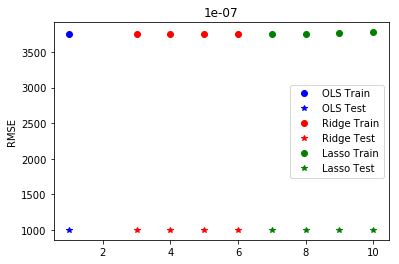

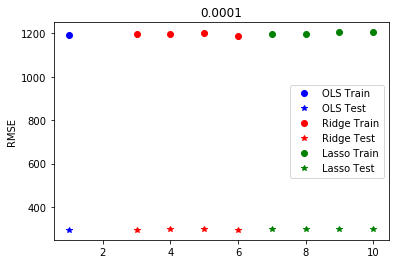

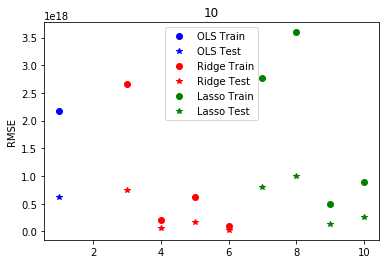

In [8]:
#Rmse calculation
alpha = [0.0000001,0.0001,10]
lamda = [0.00000001,0.0001,0.1,1]
plotY = []

#Normal SGD
for each in alpha:
    trainRmse,testRmse = [],[]
    ridgeTrainRmse,ridgeTestRmse = [],[]
    lassoTrainRmse,lassoTestRmse = [],[]
    temp1,temp2 = SGD(xTrain,yTrain,xTest,yTest,each,100)
    trainRmse.append(temp1)
    testRmse.append(temp2)
    for every in lamda:
        temp3,temp4 = ridgeSGD(xTrain,yTrain,xTest,yTest,each,every,100)
        ridgeTrainRmse.append(temp3)
        ridgeTestRmse.append(temp4)
        temp5,temp6 = lassoSGD(xTrain,yTrain,xTest,yTest,each,every,100)
        lassoTrainRmse.append(temp5)
        lassoTestRmse.append(temp6)
    plotX1 = list(range(3,7))
    plotX2 = list(range(7,11))
    plt.plot([1],trainRmse,'o',label = "OLS Train",color = "blue")
    plt.plot([1],testRmse,'*',label = "OLS Test",color = "blue")
    plt.plot(plotX1,ridgeTrainRmse,'o',label = "Ridge Train",color = "red")
    plt.plot(plotX1,ridgeTestRmse,'*',label = "Ridge Test",color = "red")
    plt.plot(plotX2,lassoTrainRmse,'o',label = "Lasso Train",color = "green")
    plt.plot(plotX2,lassoTestRmse,'*',label = "Lasso Test",color = "green")
    plt.ylabel("RMSE")
    plt.title(each)
    plt.legend()
    plt.show()

In [9]:
#importing packages for cross validation
#OLS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")

#Initializing alpha and lamda grids
alphaGrid = np.arange(0.000001,1, 0.01)
lamdaGrid = np.arange(0.0001,1, 0.1)
#Penalty for three models
penaltyGrid1 = ["none"]
penaltyGrid2 = ["l1"]
penaltyGrid3 = ["l2"]

model = SGDRegressor()

#model : SGD Regressor for OLS
parameters1 = {'eta0':alphaGrid,
             'penalty':penaltyGrid1}
grid1 = GridSearchCV(model,param_grid = parameters1, cv=5,scoring='mean_squared_error')
grid1.fit(xTrain, yTrain)
resultOls = pd.DataFrame(grid1.cv_results_)

#model : SGD Regressor for Lasso
parameters2 = {'eta0':alphaGrid,
              'alpha' : lamdaGrid,
             'penalty':penaltyGrid2}
grid2 = GridSearchCV(model,param_grid = parameters2, cv=5,scoring='mean_squared_error')
grid2.fit(xTrain, yTrain)
resultLasso = pd.DataFrame(grid2.cv_results_)

#model : SGD Regressor for Ridge
parameters3 = {'eta0':alphaGrid,
              'alpha' : lamdaGrid,
             'penalty':penaltyGrid3}
grid3 = GridSearchCV(model,param_grid = parameters3, cv=5,scoring='mean_squared_error')
grid3.fit(xTrain, yTrain)
resultRidge = pd.DataFrame(grid3.cv_results_)


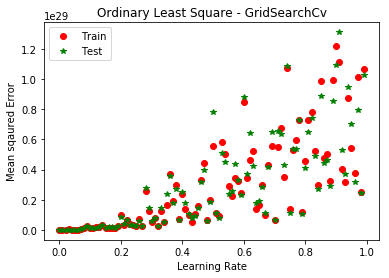


Ridge Regression - GridSearchCv(Train)


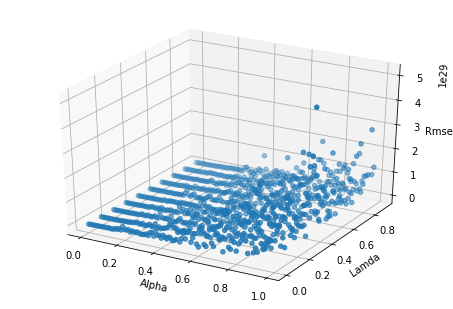


Ridge Regression - GridSearchCv(Test)


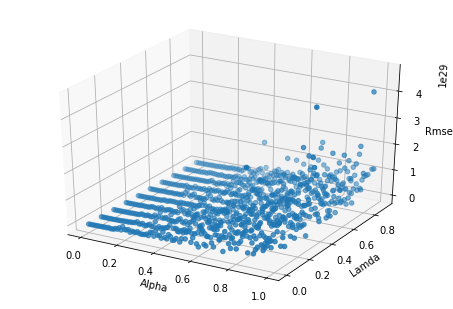


Lasso Regression - GridSearchCv(Train)


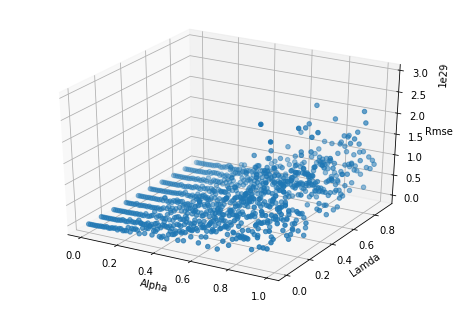


Lasso Regression - GridSearchCv(Test)


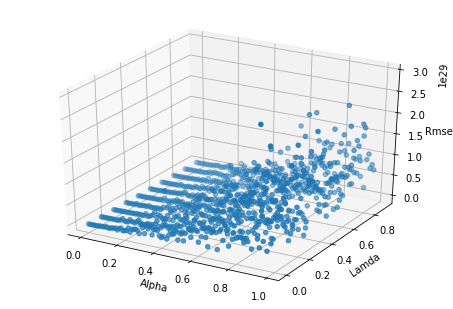

In [16]:
from mpl_toolkits.mplot3d import Axes3D
#GridSearch - OLS Graph
plt.plot(resultOls['param_eta0'],-resultOls['mean_train_score'],'o',color = 'red',label = "Train")
plt.plot(resultOls['param_eta0'],-resultOls['mean_test_score'],'*',color = 'green',label = "Test")
plt.xlabel("Learning Rate")
plt.ylabel("Mean sqaured Error")
plt.title("Ordinary Least Square - GridSearchCv")
plt.legend()
plt.show()

#GridSearch - Ridge Graph
print("\nRidge Regression - GridSearchCv(Train)")
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(resultRidge['param_eta0'],resultRidge['param_alpha'],-resultRidge['mean_train_score'])
ax.set_xlabel('Alpha')
ax.set_ylabel('Lamda')
ax.set_zlabel('Rmse')
plt.show()

print("\nRidge Regression - GridSearchCv(Test)")
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(resultRidge['param_eta0'],resultRidge['param_alpha'],-resultRidge['mean_test_score'])
ax.set_xlabel('Alpha')
ax.set_ylabel('Lamda')
ax.set_zlabel('Rmse')
plt.show()

#GridSearch - Lasso Graph
print("\nLasso Regression - GridSearchCv(Train)")
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(resultLasso['param_eta0'],resultLasso['param_alpha'],-resultLasso['mean_train_score'])
ax.set_xlabel('Alpha')
ax.set_ylabel('Lamda')
ax.set_zlabel('Rmse')
plt.show()

print("\nLasso Regression - GridSearchCv(Test)")
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(resultLasso['param_eta0'],resultLasso['param_alpha'],-resultLasso['mean_test_score'])
ax.set_xlabel('Alpha')
ax.set_ylabel('Lamda')
ax.set_zlabel('Rmse')
plt.show()

In [18]:
#Validation - OLS
from sklearn.cross_validation import cross_val_score

bestAlphaOls = grid1.best_params_['eta0']

model = SGDRegressor(eta0 = bestAlphaOls)
validated1 = -cross_val_score(model, xTrain, yTrain, cv = 5, scoring = 'mean_squared_error')
print(validated1)

#Validation - Lasso
bestAlphaLasso = grid2.best_params_['eta0']
bestLamdaLasso = grid2.best_params_['alpha']

model2 = SGDRegressor(eta0 = bestAlphaLasso,penalty = 'l1',alpha = bestLamdaLasso)
validated2 = -cross_val_score(model2, xTrain, yTrain, cv = 5, scoring = 'mean_squared_error')
print(validated2)

#Validation - Ridge
bestAlphaRidge = grid3.best_params_['eta0']
bestLamdaRidge = grid3.best_params_['alpha']

model3 = SGDRegressor(eta0 = bestAlphaRidge,penalty = 'l2',alpha = bestLamdaRidge)
validated3 = -cross_val_score(model3, xTrain, yTrain, cv = 5, scoring = 'mean_squared_error')
print(validated3)

[  8.41777104  10.37902752   8.65853529  12.86701429   7.86725392]
[  8.40399259  10.39573634   8.66839848  12.91501285   7.86033335]
[  8.39974348  10.38109614   8.65609759  12.88473342   7.86375729]


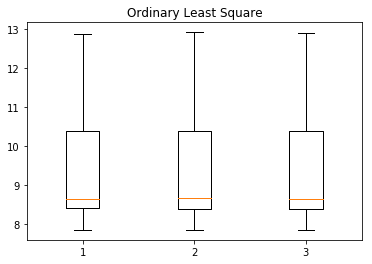

0.1001


In [24]:
plt.boxplot([validated1,validated2,validated3])
plt.title('Ordinary Least Square')
plt.show()